The content is daily weather observations from numerous Australian weather stations.

The target RainTomorrow means: Did it rain the next day? Yes or No.

# Importing libraries and dataset

In [475]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('../input/weatherAUS.csv')

# Exploring the data

In [476]:
data.shape

(142193, 24)

In [477]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [478]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [479]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


The dataset has below columns :
*  **DateThe** — date of observation
*  **Location** — The common name of the location of the weather station
*  **MinTemp** — The minimum temperature in degrees celsius
*  **MaxTemp** — The maximum temperature in degrees celsius
*  **Rainfall** — The amount of rainfall recorded for the day in mm
*  **Evaporation** — The so-called Class A pan evaporation (mm) in the 24 hours to 9am
*  **Sunshine** — The number of hours of bright sunshine in the day.
*  **WindGustDir** — The direction of the strongest wind gust in the 24 hours to midnight
*  **WindGustSpeed** — The speed (km/h) of the strongest wind gust in the 24 hours to midnight
*  **WindDir9am** — Direction of the wind at 9am
*  **WindDir3pm** — Direction of the wind at 3pm
*  **WindSpeed9am** — Wind speed (km/hr) averaged over 10 minutes prior to 9am
*  **WindSpeed3pm** — Wind speed (km/hr) averaged over 10 minutes prior to 3pm
*  **Humidity9am** — Humidity (percent) at 9am
*  **Humidity3pm** — Humidity (percent) at 3pm
*  **Pressure9am** — Atmospheric pressure (hpa) reduced to mean sea level at 9am
*  **Pressure3pm** — Atmospheric pressure (hpa) reduced to mean sea level at 3pm
*  **Cloud9am** — Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear *  sky whilst an 8 indicates that it is completely overcast.
*  **Cloud3pm** — Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
*  **Temp9am** — Temperature (degrees C) at 9am
*  **Temp3pm** — Temperature (degrees C) at 3pm
*  **RainToday** — Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
*  **RISK_MM** — The amount of rain. A kind of measure of the "risk".
*  **RainTomorrow** — The target variable. Did it rain tomorrow?

The type of machine learning we will be doing is called **classification**, because when we make predictions we are classifying each day as rainy or not. More specifically, we are performing **binary classification**, which means that there are only two different states we are classifying.

# Null values
Let's get rid of columns with significant amount of null values. And in the rest columns we will drop rows with null values. 

In [480]:
data_null_percent = pd.Series(index=data.columns)

for column_name in data:
    data_null_percent[column_name] = data[column_name].count()/data.shape[0]
    
data_null_percent_sorted = data_null_percent.sort_values()

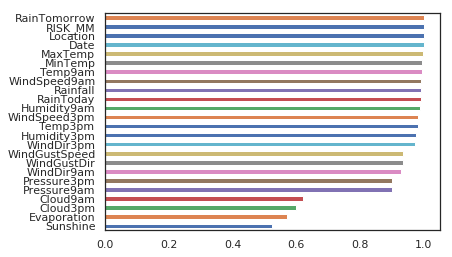

In [481]:
data_null_percent_sorted.plot.barh()

**Cloud9pm, Cloud3pm, Evaporation, and Sunshine** must be droped since significant amount of records in these columns is missed. Also we should exclude **RISK_MM** because it can leak the answers to the model and reduce its predictability.

In [482]:
data = data.drop(columns=['Cloud9am','Cloud3pm', 'Evaporation', 'Sunshine','RISK_MM'])

Let's drop rows with null values in them.

In [483]:
data = data.dropna()
data.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Temp9am          False
Temp3pm          False
RainToday        False
RainTomorrow     False
dtype: bool

In [484]:
data.shape

(112925, 19)

In [485]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


# Split into train and test
We must be aware of one important thing: any change we make to the train data, we also need to make to the test data, otherwise we will be unable to use our model. 

In [486]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)

In [487]:
print("train: " + str(train.shape) + ", test: " + str(test.shape))

train: (90340, 19), test: (22585, 19)


# Deal with categorical variables
To apply such algorithms as Logistic Regression we need to convert the non-numeric data into numeric data. Categorical variables with only 2 possible values can be converted into variables with 0s and 1s as values. For categorical variables with 3 and more possible value we will create dummy variables.

Convert values in columns "RainToday" and "RainTomorrow" from **"No" and "Yes"** to **0 and 1**.

In [488]:
train["RainToday"] = train["RainToday"].map({"No":0, "Yes":1})
train["RainTomorrow"] = train["RainTomorrow"].map({"No":0, "Yes":1})

test["RainToday"] = test["RainToday"].map({"No":0, "Yes":1})
test["RainTomorrow"] = test["RainTomorrow"].map({"No":0, "Yes":1})

Visualization of how categorical variables impact on forming tomorrow's rain

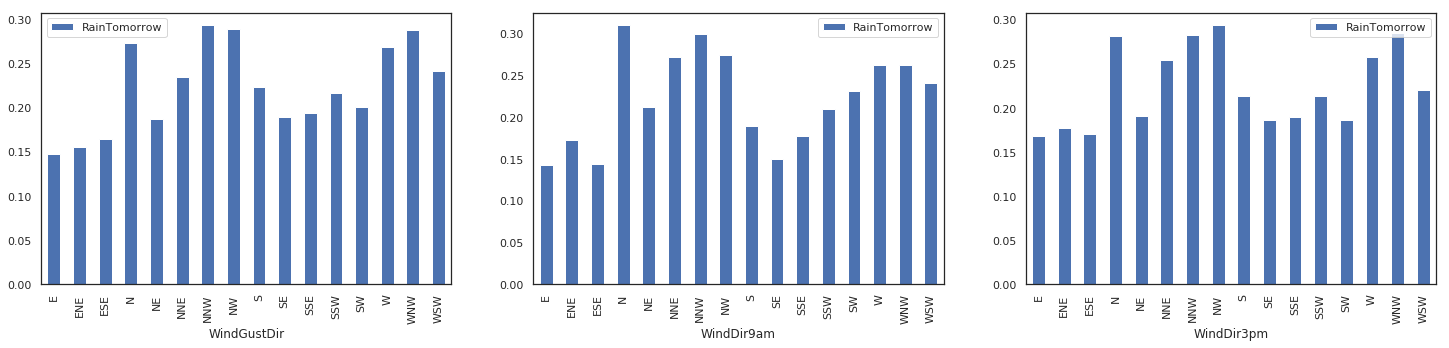

In [489]:
def category_impact_plot(variable, subplot_position):
    plt.subplot(subplot_position)
    pd.pivot_table(train, index=variable, values='RainTomorrow').plot.bar(figsize=(25,5), ax=plt.gca()) 
   
plt.figure(1)
category_impact_plot("WindGustDir", 131)
category_impact_plot("WindDir9am", 132)
category_impact_plot("WindDir3pm", 133)


Create dummy variables for **WindGustDir, WindDir9am, WindDir3pm**

In [490]:
categorical_variables = ["WindGustDir", "WindDir9am", "WindDir3pm"]

train = pd.get_dummies(train, columns=categorical_variables)
test = pd.get_dummies(test, columns=categorical_variables)

In [491]:
train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
72422,2016-07-27,Nhil,5.9,12.6,3.4,50.0,24.0,24.0,85.0,59.0,1017.7,1021.3,8.0,11.7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
82638,2011-02-08,Brisbane,21.3,26.8,6.4,26.0,4.0,7.0,92.0,75.0,1016.7,1014.5,21.6,24.4,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
137464,2012-10-21,Darwin,24.8,33.3,0.0,41.0,9.0,22.0,58.0,50.0,1012.0,1007.2,29.5,31.7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
89393,2013-06-01,GoldCoast,14.7,22.8,1.2,28.0,13.0,9.0,73.0,69.0,1023.8,1019.2,18.9,21.3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
101057,2012-01-18,Nuriootpa,17.5,29.0,2.4,39.0,13.0,13.0,75.0,40.0,1015.2,1014.5,19.3,28.1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


# Does Location affect the formation of rain?

Text(0,0.5,'')

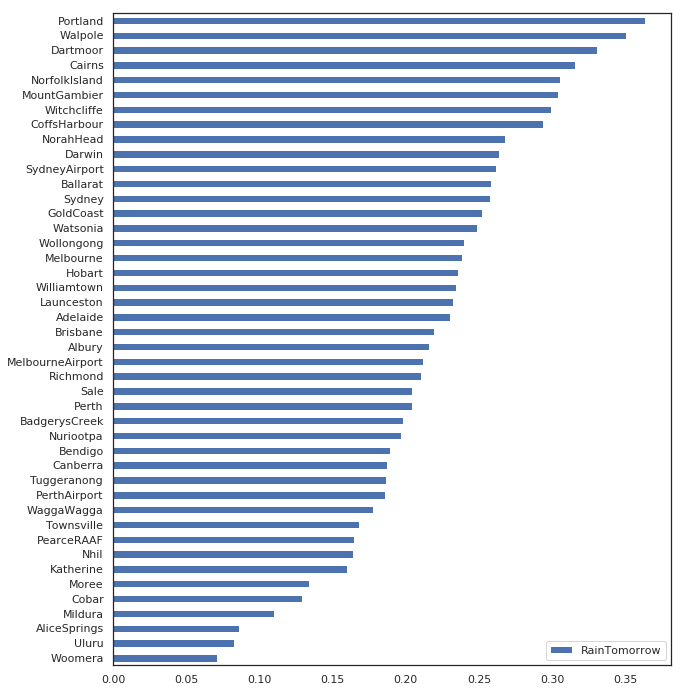

In [492]:
location_pivot = train.pivot_table(index="Location", values="RainTomorrow")
location_pivot_sorted = location_pivot.sort_values(by=["RainTomorrow"])

location_pivot_sorted.plot.barh(figsize=(10,12))
plt.ylabel('')

Yes, **Location** obviously affect the formation of tomorrow's rain! So, we're going to use this variable, and in order to use this categorical variable we have to create dummies.

In [493]:
train = pd.get_dummies(train, columns=["Location"])
test = pd.get_dummies(test, columns=["Location"])

# Does Date affect the formation of rain?

In [494]:
train["Month"] = pd.to_datetime(train["Date"]).dt.month
test["Month"] = pd.to_datetime(test["Date"]).dt.month

Text(0,0.5,'')

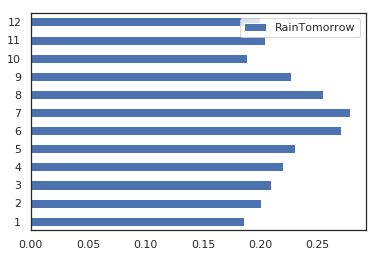

In [495]:
date_pivot = train.pivot_table(index="Month", values="RainTomorrow")#.sort_index(ascending=False)

date_pivot.plot.barh()
plt.ylabel('')

There's a certain tendency, season 6-8 is a rainy season.

In [496]:
train = pd.get_dummies(train, columns=["Month"])
test = pd.get_dummies(test, columns=["Month"])

# Rescaling
Looking at our numeric columns, we can see a big difference between the range of each.  In order to make sure these values are equally weighted within our model, we'll need to rescale the data.

Rescaling simply stretches or shrinks the data as needed to be on the same scale, in our case between 0 and 1.

In [497]:
# the preprocessing.minmax_scale() function allows us to quickly and easily rescale our data
from sklearn.preprocessing import minmax_scale

# Added 2 backets to make it a dataframe. Otherwise you will get a type error stating cannot iterate over 0-d array.
def apply_minmax_scale(dataset, features):
    for feature in features:
        dataset[feature] = minmax_scale(dataset[[feature]])
        
numerical_features = ["MinTemp","MaxTemp", "Rainfall", "WindGustSpeed", "WindSpeed9am",
                     "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", 
                     "Pressure3pm", "Temp9am", "Temp3pm"]

apply_minmax_scale(train, numerical_features)
apply_minmax_scale(test, numerical_features)

train[numerical_features].head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
72422,0.334917,0.223714,0.009249,0.335938,0.258824,0.258824,0.85,0.59,0.614876,0.715210,0.256351,0.222222
82638,0.700713,0.541387,0.017410,0.148438,0.023529,0.058824,0.92,0.75,0.598347,0.605178,0.570439,0.504444
137464,0.783848,0.686801,0.000000,0.265625,0.082353,0.235294,0.58,0.50,0.520661,0.487055,0.752887,0.666667
89393,0.543943,0.451902,0.003264,0.164062,0.129412,0.082353,0.73,0.69,0.715702,0.681230,0.508083,0.435556
101057,0.610451,0.590604,0.006529,0.250000,0.129412,0.129412,0.75,0.40,0.573554,0.605178,0.517321,0.586667


# Visualization of how numerical variables impact on forming tomorrow's rain

In [498]:
rainTomorrow_yes = train[train["RainTomorrow"] == 1]
rainTomorrow_no = train[train["RainTomorrow"] == 0]

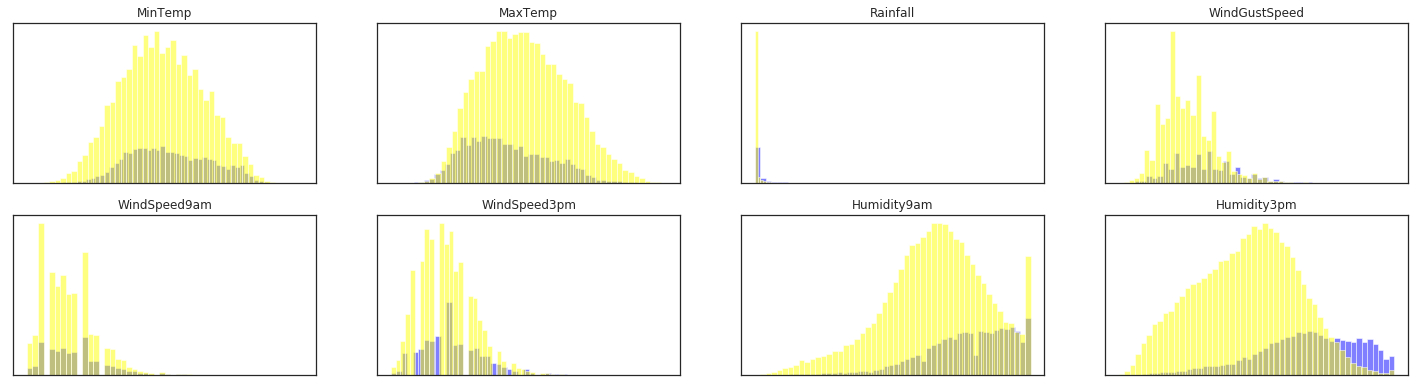

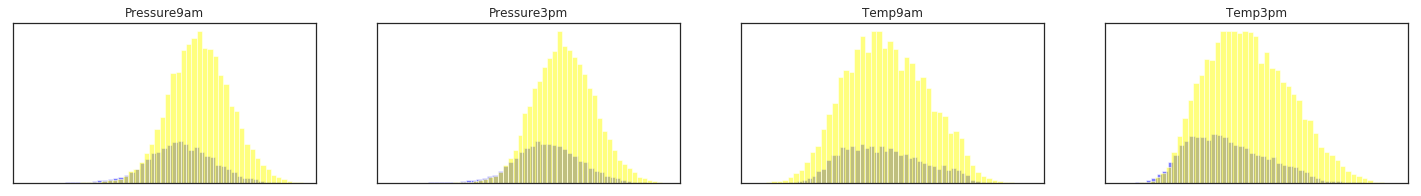

In [499]:
def variable_impact_plot(variable, subplot_position):
    plt.subplot(subplot_position)
    rainTomorrow_yes[variable].plot.hist(figsize=(25,10), alpha=0.5, color="blue", bins=50, ax=plt.gca())
    rainTomorrow_no[variable].plot.hist(figsize=(25,10), alpha=0.5, color="yellow", bins=50, ax=plt.gca())
    plt.ylabel('')
    plt.xticks([], [])
    plt.yticks([], [])
    plt.title(variable)

plt.figure(1)
variable_impact_plot("MinTemp", 341)
variable_impact_plot("MaxTemp", 342)
variable_impact_plot("Rainfall", 343)
variable_impact_plot("WindGustSpeed", 344)
variable_impact_plot("WindSpeed9am", 345)
variable_impact_plot("WindSpeed3pm", 346)
variable_impact_plot("Humidity9am", 347)
variable_impact_plot("Humidity3pm", 348)
plt.figure(2)
variable_impact_plot("Pressure9am", 341)
variable_impact_plot("Pressure3pm", 342)
variable_impact_plot("Temp9am", 343)
variable_impact_plot("Temp3pm", 344)

We are intrested in variables with plots where blue and yellow areas have different shapes. Such variables have impact(positive or negative) on forming tomorrow's rain. The most obvious one is **Humidity3pm**! The rest is not that clear, we will use another feature selection method.

# Collinearity
We now have 73 possible feature columns we can use to train our model. One thing to be aware of as you start to add more features is a concept called collinearity. Collinearity occurs where more than one feature contains data that are similar.

The effect of collinearity is that your model will overfit - you may get great results on your test data set, but then the model performs worse on unseen data (like the test set).

 A common way to spot collinearity is to plot correlations between each pair of variables in a heatmap.

In [500]:
# columns we will be using all the way down
columns = list(train.columns[1:])
columns.remove("RainTomorrow")

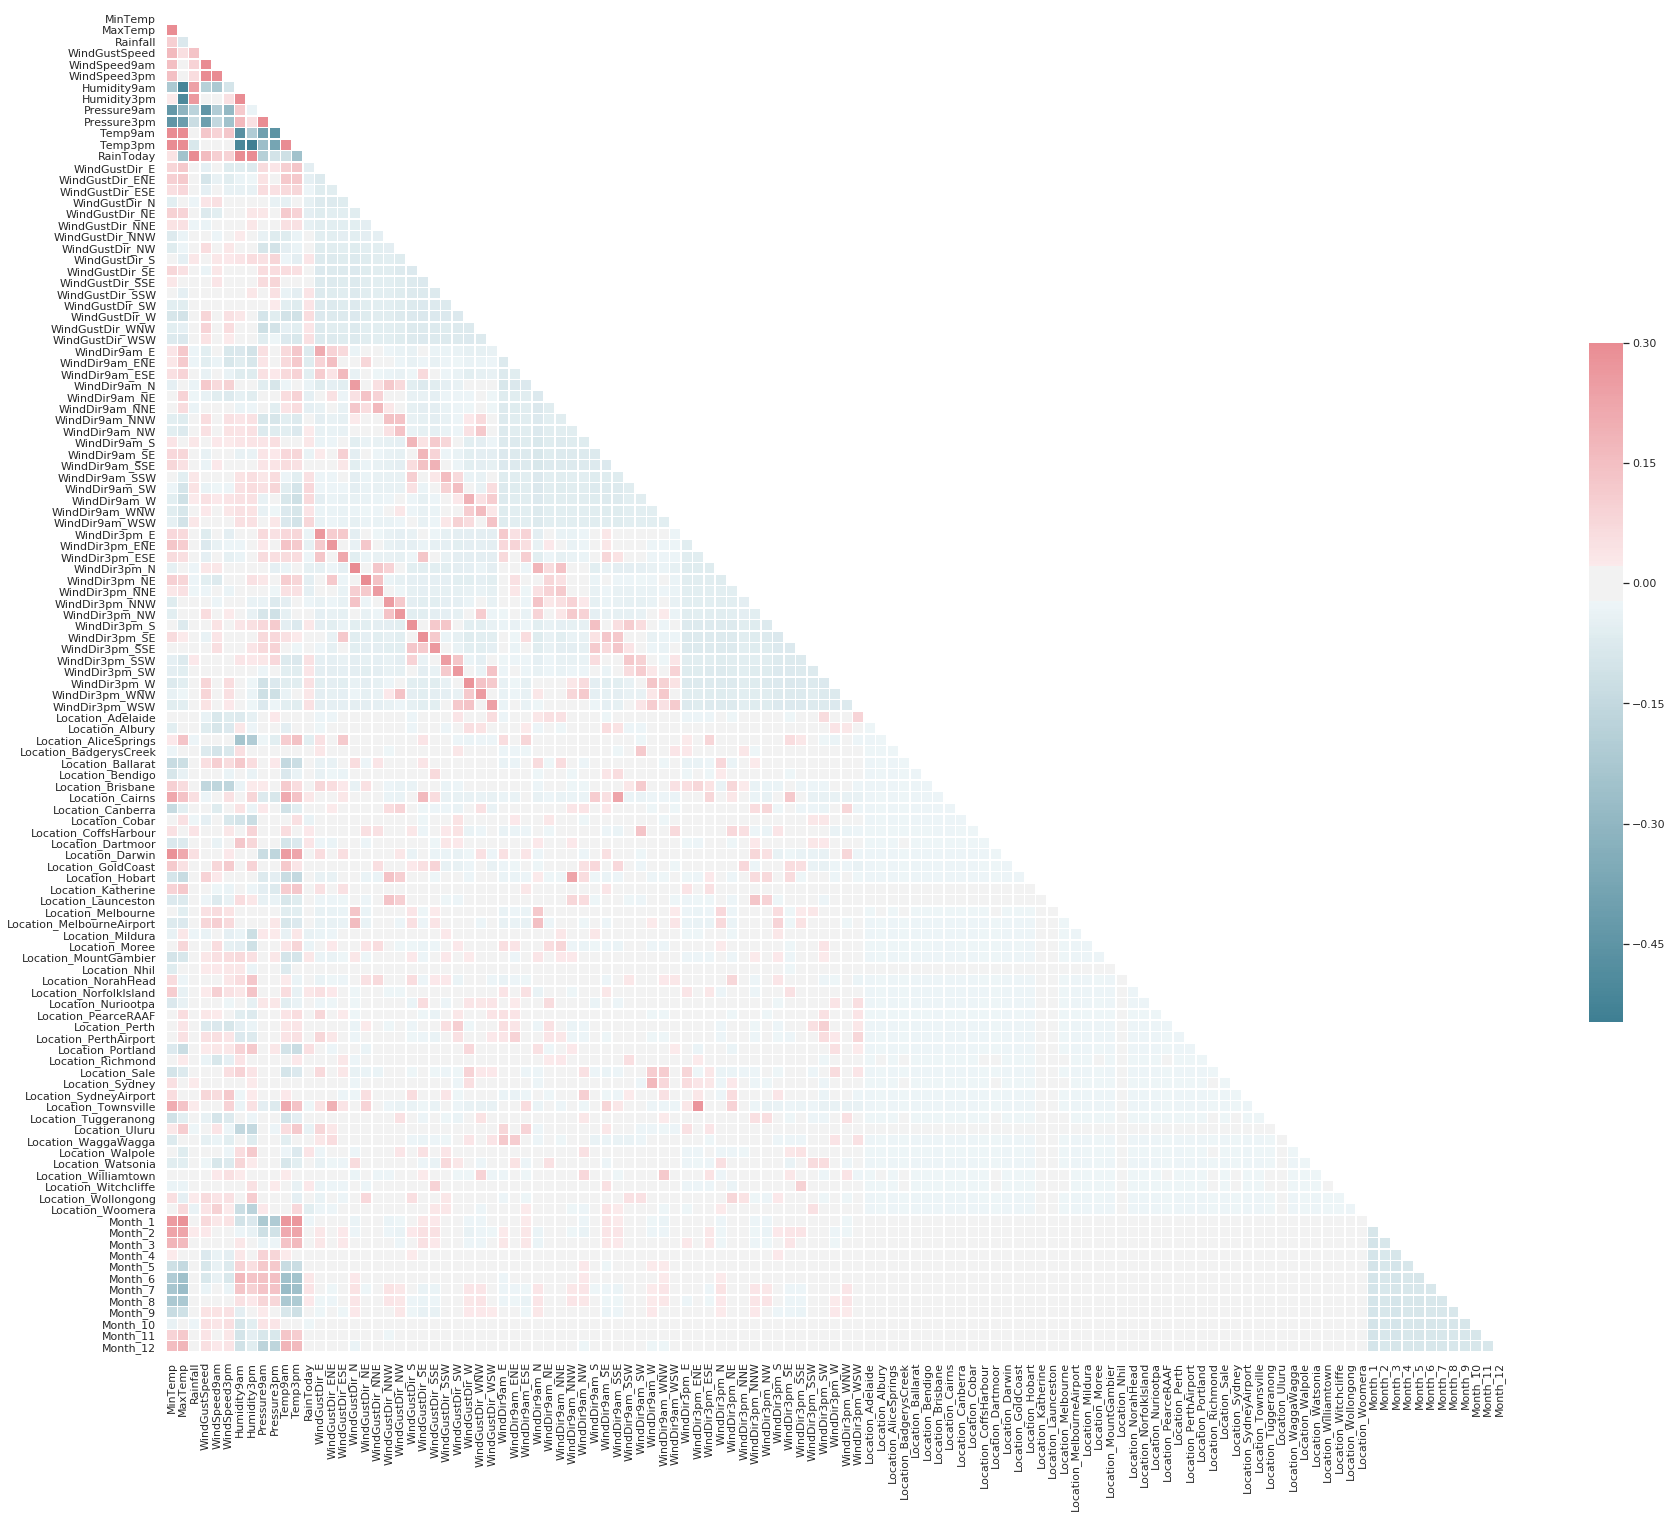

In [501]:
import seaborn as sns

# custom function to set the style for heatmap
def plot_correlation_heatmap(df):
    corr = df.corr()
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(30, 25))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()

plot_correlation_heatmap(train[columns])

We can see that there is correlation about 30-50% between some variables. That's not enough to remove one of them and rely on the other.

Apart from that, we should remove one of each of our dummy variables to reduce the collinearity in each. We'll remove:
* WindGustDir_E
* WindDir9am_E
* WindDir3pm_E

# Feature selection
In order to select the best-performing features, we need a way to measure which of our features are relevant to our outcome - in this case, the impact on forming tomorrow's rain. One effective way is by training a logistic regression model using all of our features, and then looking at the coefficients of each feature.

The scikit-learn LogisticRegression class has an attribute in which coefficients are stored after the model is fit, LogisticRegression.coef_. We first need to train our model, after which we can access this attribute.

In [502]:
# Applying Logistic Regression
from sklearn.linear_model import LogisticRegression
logisticRegression = LogisticRegression()
logisticRegression.fit(train[columns], train["RainTomorrow"])
coefficients = logisticRegression.coef_
print(coefficients)

[[  1.99767882  -1.21188896   2.55831749   7.84522782  -0.6746667
   -2.62809023   0.39033768   7.25354702   6.81907228 -10.79514013
    0.34083098  -0.19024156   0.44956362  -0.31425534  -0.36001398
   -0.13084735  -0.30769522  -0.49920206  -0.5051517   -0.19686529
   -0.26192246  -0.15189509  -0.11579822  -0.13963133  -0.20782901
   -0.20556826  -0.30761676  -0.3121622   -0.16076211  -0.28058032
   -0.0684976   -0.36936681  -0.12773033  -0.02080563   0.05192532
   -0.32731773  -0.38880356  -0.5282741   -0.45032331  -0.42445838
   -0.3685959   -0.16358147  -0.23704421  -0.28988885  -0.18387347
   -0.30136764  -0.28230677  -0.32934751  -0.02453573  -0.50872305
   -0.18244893   0.13529792   0.0424792   -0.31590856  -0.29988902
   -0.43561284  -0.406605    -0.55585273  -0.24092163  -0.06713508
   -0.40433901   0.58630329   0.40005994   0.22323695   0.05826074
   -0.48736213   0.15288098   0.27239349  -0.24775667   0.1164718
    0.42302238  -0.14929481  -0.08173262  -0.75103574  -0.579015

The coef() method returns a NumPy array of coefficients, in the same order as the features that were used to fit the model. To make these easier to interpret, we can convert the coefficients to a pandas series, adding the column names as the index:

In [503]:
feature_importance = pd.Series(coefficients[0], index=columns)
print(feature_importance)

MinTemp                    1.997679
MaxTemp                   -1.211889
Rainfall                   2.558317
WindGustSpeed              7.845228
WindSpeed9am              -0.674667
WindSpeed3pm              -2.628090
Humidity9am                0.390338
Humidity3pm                7.253547
Pressure9am                6.819072
Pressure3pm              -10.795140
Temp9am                    0.340831
Temp3pm                   -0.190242
RainToday                  0.449564
WindGustDir_E             -0.314255
WindGustDir_ENE           -0.360014
WindGustDir_ESE           -0.130847
WindGustDir_N             -0.307695
WindGustDir_NE            -0.499202
WindGustDir_NNE           -0.505152
WindGustDir_NNW           -0.196865
WindGustDir_NW            -0.261922
WindGustDir_S             -0.151895
WindGustDir_SE            -0.115798
WindGustDir_SSE           -0.139631
WindGustDir_SSW           -0.207829
WindGustDir_SW            -0.205568
WindGustDir_W             -0.307617
WindGustDir_WNW           -0

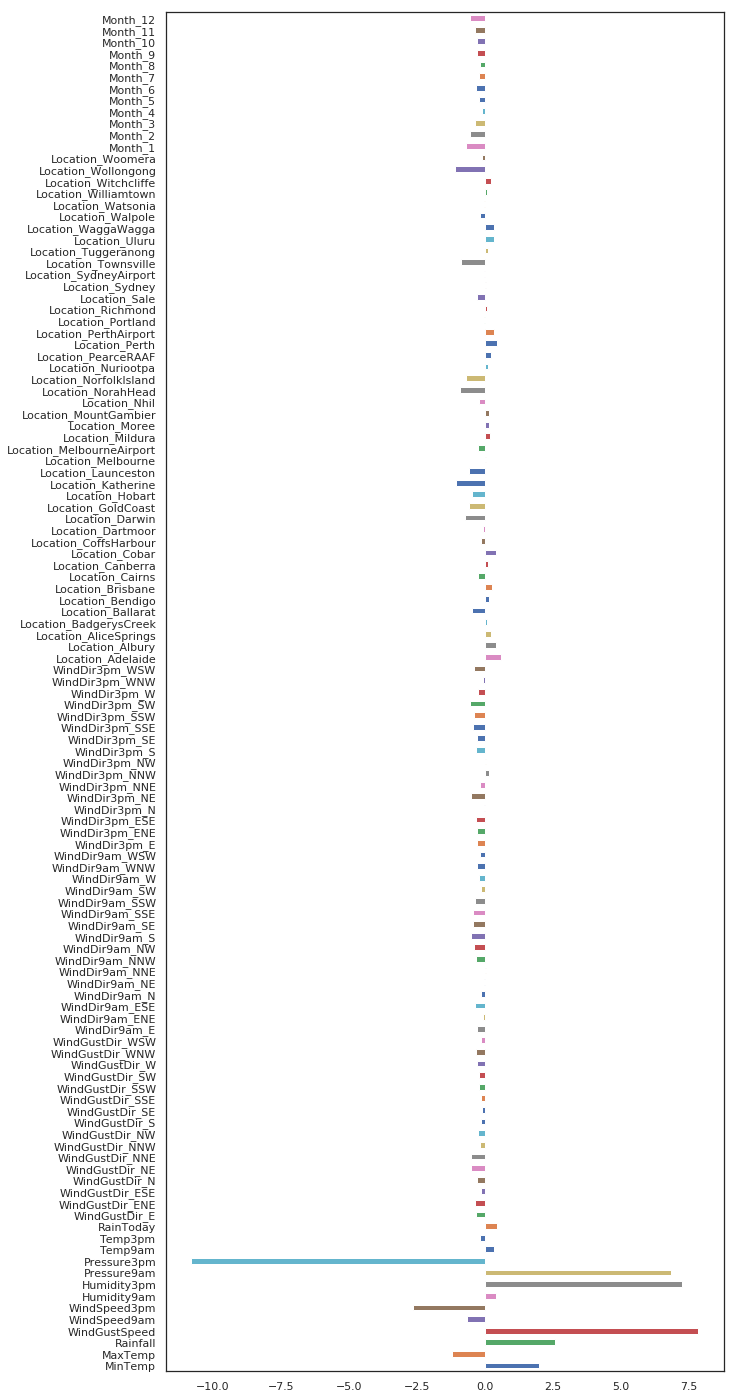

In [504]:
# Plotting as a horizontal Bar chart
feature_importance.plot.barh(figsize=(10,25))
plt.show()

The plot we generated shows a range of both positive and negative values. Whether the value is positive or negative isn't as important in this case, relative to the magnitude of the value. If you think about it, this makes sense. A feature that indicates strongly whether a it's not going to rain tomorrow is just as useful as a feature that indicates strongly that a it's going to rain tomorrow, given they are mutually exclusive outcomes.

To make things easier to interpret, we'll alter the plot to show all positive values, and have sorted the bars in order of size:

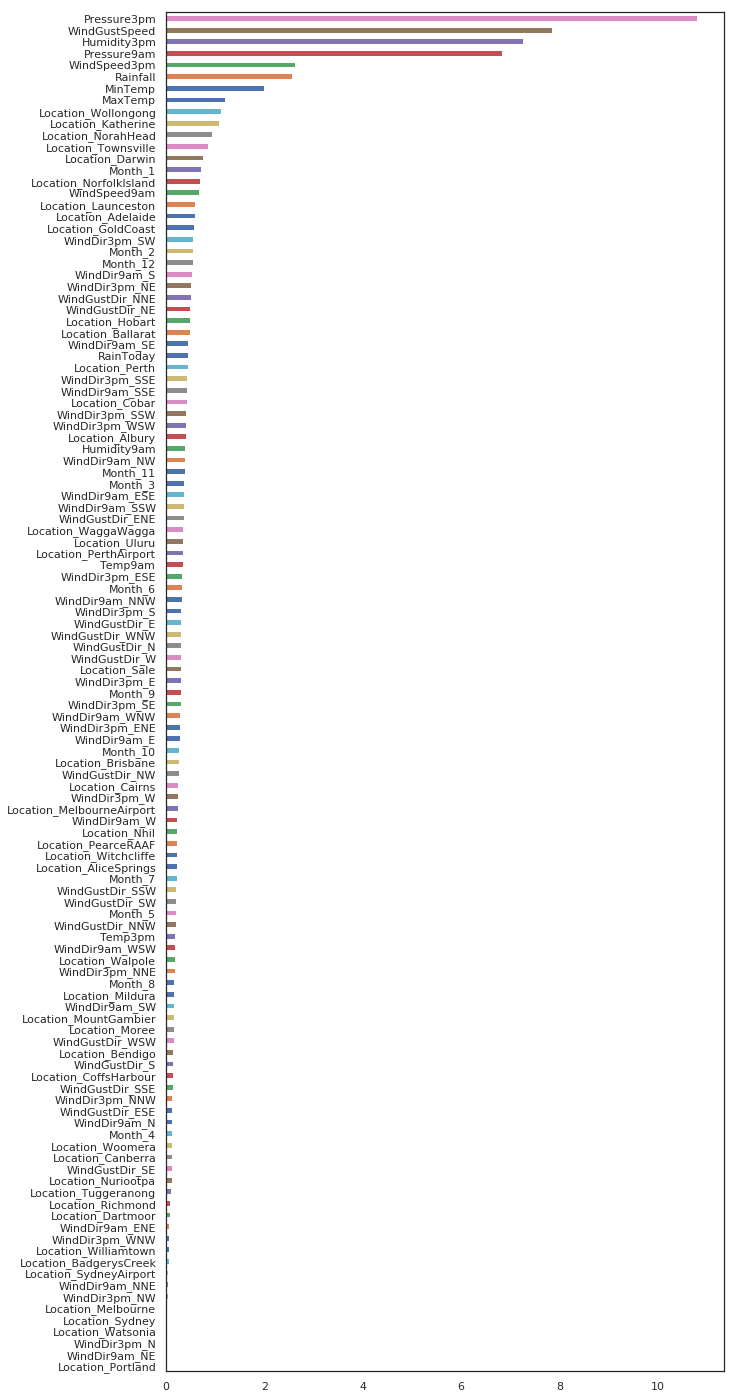

In [505]:
ordered_feature_importance = feature_importance.abs().sort_values()
ordered_feature_importance.plot.barh(figsize=(10,25))
plt.show()

We'll train a model with the top 4 scores.

In [506]:
predictors = ["Pressure3pm", "WindGustSpeed", "Pressure9am", "Humidity3pm"]

lr = LogisticRegression()
lr.fit(train[predictors], train["RainTomorrow"])
predictions = lr.predict(test[predictors])
print(predictions)

[0 0 0 ... 0 1 0]


In [507]:
# Calculating the accuracy using the k-fold cross validation method with k=10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, train[predictors], train["RainTomorrow"], cv=10)
print(scores)

[0.84371887 0.8458218  0.83907028 0.84394023 0.84259464 0.84436573
 0.83958818 0.84257722 0.84246651 0.84368427]


In [508]:
# Taking the mean of all the scores
accuracy = scores.mean()
print(accuracy)

0.8427827735774208
